# Twitch-musae

Twitch-musae数据集用于节点分类和转移学习的数据集是以特定语言流式传输的游戏玩家Twitch用户网络。 节点是用户本身，链接是它们之间的相互友谊。
 数据来源： https://snap.stanford.edu/data/twitch-social-networks.html
 
 Attributes of Twitch-musae table are as following:
*  id: user id
*  days: Number of days of ID generation
*  mature: mature or not
*  views: Number of views
*  partner: partner or not
*  new_id: new user id

使用Apriori模型生成和分析每个用户的（‘days'）、（’views‘）和（’partner‘）的频繁项集以及关联规则。

为了进行更精密的分析，将days和views设置为符合以下范围的。

days_values = [1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]


views_values = [1, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 100500000]

# 数据获取&&预处理

In [1]:
import pandas as pd


twitch_file_path = "/kaggle/input/test222/twitch/twitch/DE/musae_DE_target.csv"


twitch_data = pd.read_csv(twitch_file_path)
twitch_data.head()

,id,days,mature,views,partner,new_id
0,37905227,2149,True,162078,False,5079
1,63102384,1574,True,1370,False,4281
2,109414094,1034,True,6043,False,992
3,84163849,1319,True,94298,True,9021
4,38240837,2137,True,2323,False,330


In [2]:
twitch_data.shape

(9498, 6)

In [3]:
# '确认" days" 列的最大值
max_days = twitch_data['days'].max()

# '确认" views" 列的最大值
max_views = twitch_data['views'].max()

print("最高的 days 值:", max_days)
print("最高的views 值:", max_views)

最高的 days 值: 3953
最高的views 值: 100394785


,id,days,mature,views,partner,new_id
0,37905227,"(2000, 2500]",True,162078,False,5079
1,63102384,"(1500, 2000]",True,1370,False,4281
2,109414094,"(1000, 1500]",True,6043,False,992
3,84163849,"(1000, 1500]",True,94298,True,9021
4,38240837,"(2000, 2500]",True,2323,False,330


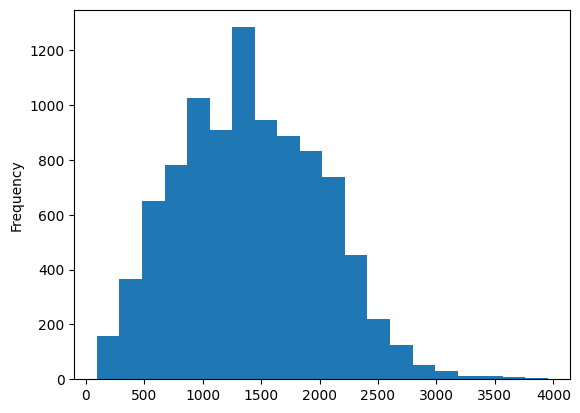

In [4]:
#查找最大值并划分范围
twitch_data['days'].plot.hist(bins=20)
days_values = [1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
twitch_data['days'] = pd.cut(twitch_data['days'],days_values)
twitch_data['days'] = twitch_data['days'].astype('str')
twitch_data['days'].value_counts()
twitch_data.head()

In [5]:
#查找最大值并划分范围
views_values = [1, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 100500000]
twitch_data['views'] = pd.cut(twitch_data['views'],views_values)
twitch_data['views'] = twitch_data['views'].astype('str')
twitch_data['views'].value_counts()
twitch_data.head()

,id,days,mature,views,partner,new_id
0,37905227,"(2000, 2500]",True,"(100000, 500000]",False,5079
1,63102384,"(1500, 2000]",True,"(1, 5000]",False,4281
2,109414094,"(1000, 1500]",True,"(5000, 10000]",False,992
3,84163849,"(1000, 1500]",True,"(50000, 100000]",True,9021
4,38240837,"(2000, 2500]",True,"(1, 5000]",False,330


In [6]:
#分析葡萄酒产地 品种 打分三个属性
print('数据行数:', len(twitch_data))
twitch_data = twitch_data[[ 'days', 'views', 'partner']]
twitch_data = twitch_data.dropna(how='any')
print('缺失部分剔除后数据行数:', len(twitch_data))

数据行数: 9498
缺失部分剔除后数据行数: 9498


# 频繁模式挖掘

名称："Twitch Users Days-Views-Partner(TUDVP)"

计算'days'，’views’，‘partner’的 频繁项集以及关联规则

In [7]:
pip install efficient_apriori

Note: you may need to restart the kernel to use updated packages.


In [8]:
import matplotlib
import matplotlib.pyplot as plt
from efficient_apriori import apriori


In [9]:
apriori_data = []
for _, (days, views, partner) in twitch_data.iterrows():
    apriori_data.append((days, views, str(partner)))
#利用aprori算法进行频繁算法
itemsets, rules = apriori(apriori_data, min_support=0.005,  min_confidence=0.3)

In [10]:
itemsets

{1: {('(2000, 2500]',): 1460,
  ('(100000, 500000]',): 465,
  ('False',): 8901,
  ('(1500, 2000]',): 2260,
  ('(1, 5000]',): 4237,
  ('(1000, 1500]',): 2800,
  ('(5000, 10000]',): 1587,
  ('(50000, 100000]',): 489,
  ('True',): 597,
  ('(10000, 50000]',): 2412,
  ('(1, 500]',): 583,
  ('(500, 1000]',): 2076,
  ('(1000000, 5000000]',): 147,
  ('(3000, 3500]',): 51,
  ('(500000, 1000000]',): 107,
  ('(2500, 3000]',): 255},
 2: {('(1, 5000]', '(1, 500]'): 392,
  ('(1, 5000]', '(1000, 1500]'): 1220,
  ('(1, 5000]', '(1500, 2000]'): 960,
  ('(1, 5000]', '(2000, 2500]'): 536,
  ('(1, 5000]', '(2500, 3000]'): 59,
  ('(1, 5000]', '(500, 1000]'): 1049,
  ('(1, 5000]', 'False'): 4237,
  ('(1, 500]', '(10000, 50000]'): 89,
  ('(1, 500]', '(5000, 10000]'): 92,
  ('(1, 500]', 'False'): 577,
  ('(1000, 1500]', '(10000, 50000]'): 749,
  ('(1000, 1500]', '(100000, 500000]'): 144,
  ('(1000, 1500]', '(5000, 10000]'): 465,
  ('(1000, 1500]', '(50000, 100000]'): 164,
  ('(1000, 1500]', 'False'): 2642,
  

In [11]:
#导出关联规则，计算其支持度和置信度
rules

[{(1, 500]} -> {(1, 5000]},
 {(1000, 1500]} -> {(1, 5000]},
 {(1500, 2000]} -> {(1, 5000]},
 {(2000, 2500]} -> {(1, 5000]},
 {(500, 1000]} -> {(1, 5000]},
 {False} -> {(1, 5000]},
 {(1, 5000]} -> {False},
 {(1, 500]} -> {False},
 {(10000, 50000]} -> {(1000, 1500]},
 {(100000, 500000]} -> {(1000, 1500]},
 {(50000, 100000]} -> {(1000, 1500]},
 {(1000, 1500]} -> {False},
 {(2500, 3000]} -> {(10000, 50000]},
 {(10000, 50000]} -> {False},
 {(100000, 500000]} -> {False},
 {True} -> {(100000, 500000]},
 {(100000, 500000]} -> {True},
 {(1000000, 5000000]} -> {(1500, 2000]},
 {(1000000, 5000000]} -> {True},
 {(1500, 2000]} -> {False},
 {(2000, 2500]} -> {False},
 {(2500, 3000]} -> {False},
 {(500, 1000]} -> {False},
 {(5000, 10000]} -> {False},
 {(50000, 100000]} -> {False},
 {(500000, 1000000]} -> {True},
 {(1, 500], False} -> {(1, 5000]},
 {(1, 5000], (1, 500]} -> {False},
 {(1, 500]} -> {(1, 5000], False},
 {(1000, 1500], False} -> {(1, 5000]},
 {(1, 5000], (1000, 1500]} -> {False},
 {(1000,

In [12]:
#计算关联规则与置信度
for rule in sorted(rules, key=lambda rule: rule.confidence):
  print(repr(rule), 'support:', rule.support, 'confidence:', rule.confidence,"\n")

{(100000, 500000], False} -> {(1500, 2000]} support: 0.007369972625815961 confidence: 0.30303030303030304 

{(100000, 500000]} -> {(1000, 1500]} support: 0.015161086544535692 confidence: 0.3096774193548387 

{(10000, 50000]} -> {(1000, 1500]} support: 0.07885870709623079 confidence: 0.310530679933665 

{(10000, 50000]} -> {(1000, 1500], False} support: 0.07885870709623079 confidence: 0.310530679933665 

{(10000, 50000], False} -> {(1000, 1500]} support: 0.07885870709623079 confidence: 0.31299623903050566 

{(50000, 100000], False} -> {(1000, 1500]} support: 0.015161086544535692 confidence: 0.3302752293577982 

{(50000, 100000]} -> {(1000, 1500]} support: 0.017266793009054537 confidence: 0.33537832310838445 

{(1000000, 5000000]} -> {(1500, 2000], True} support: 0.0052642661612971155 confidence: 0.3401360544217687 

{(1500, 2000], True} -> {(100000, 500000]} support: 0.006527690040008423 confidence: 0.3502824858757062 

{(100000, 500000], True} -> {(1000, 1500]} support: 0.0086333965045

# 可视化

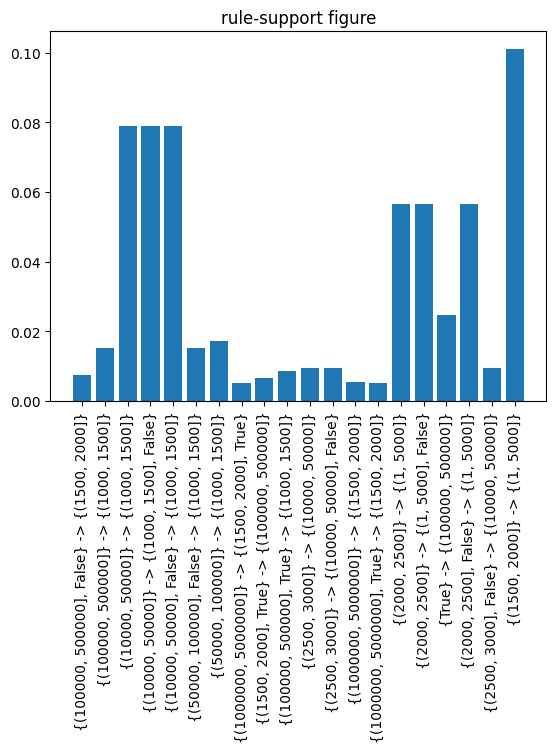

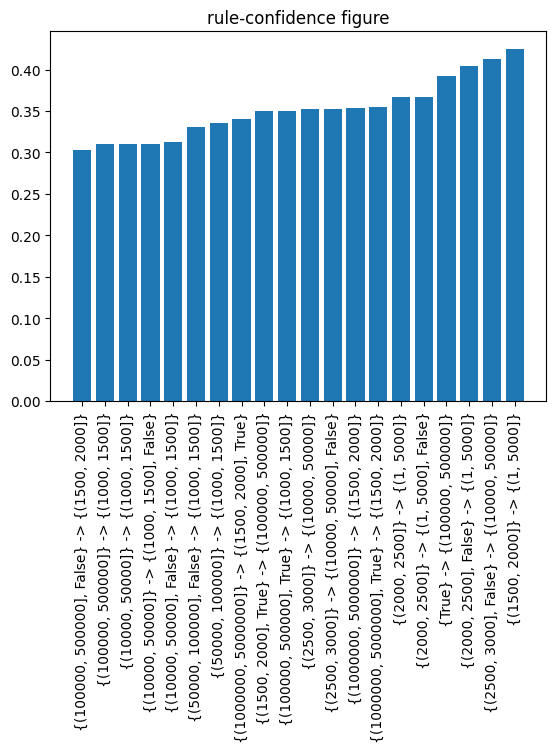

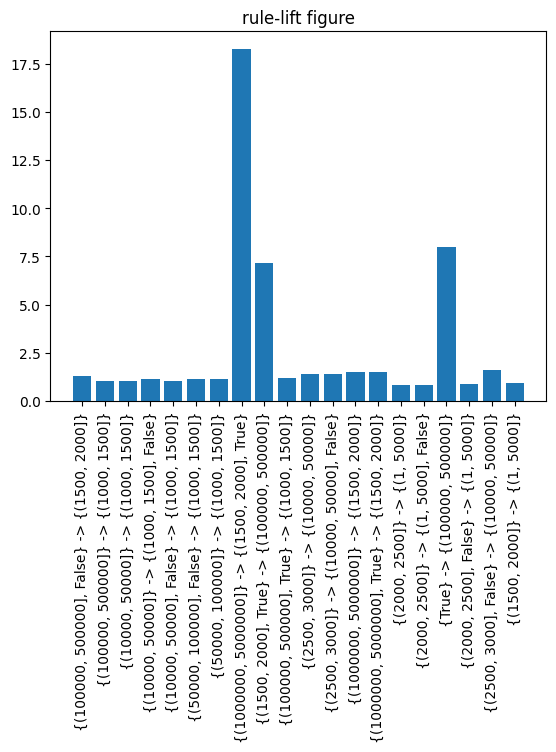

In [13]:
def plot_bar(rules, restaurants, title):
    plt.title(title)
    plt.xticks(range(len(restaurants)),rules,rotation=90)
    plt.bar(range(len(restaurants)), restaurants)
    plt.show()

def visualization(big_rule_list):
    rules = []
    conf = []
    support = []
    lift = []
    for rule in big_rule_list:
        rules.append(repr(rule))
        conf.append(rule.confidence)
        support.append(rule.support)
        lift.append(rule.lift)
    plot_bar(rules, support, 'rule-support figure')
    plot_bar(rules, conf, 'rule-confidence figure')
    plot_bar(rules, lift, 'rule-lift figure')

visualization(sorted(rules, key=lambda rule: rule.confidence)[:20])